In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Download NLTK data (if not already downloaded)
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\santo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
# Load your dataset (containing text and sentiment labels)
import pandas as pd
data = pd.read_csv('sentiment_train.csv')

In [73]:
data.head(100)

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...,...
95,4c41a35a2a,Happy Mothers day to all you Mums out there,positive
96,61a8e11e8a,"CASEY`S GONE?!?! BUT WHY?! So, she piddled a ...",negative
97,447dc22c81,hemp cloth is marvelous but unfortunately no,negative
98,3408db03a3,Gonna read a story bout adam lambert online th...,neutral


sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64


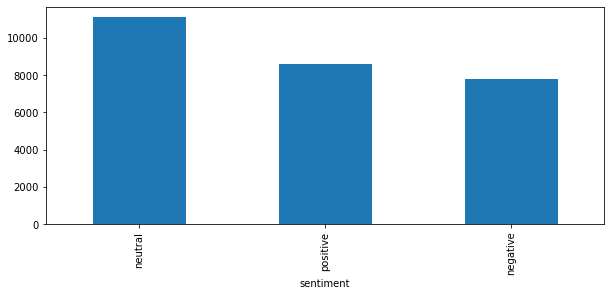

In [67]:
import matplotlib.pyplot as plt
my_tags = ['neutral','positive','negative']
plt.figure(figsize=(10,4))
print(data.sentiment.value_counts())
data.sentiment.value_counts().plot(kind='bar');

In [74]:
# Preprocess the data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        return " ".join(filtered_words)

In [75]:
data['cleaned_text'] = data['text'].apply(preprocess_text)

In [76]:
data['cleaned_text'].fillna('', inplace=True)

In [15]:
# Split the dataset into training and testing sets
X = data['cleaned_text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
data

,textID,text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going",neutral,responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,negative,boss bullying
3,9642c003ef,what interview! leave me alone,negative,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,sons put releases already bought
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,negative,wish could come see u denver husband lost job ...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative,wondered rake client made clear force devs lea...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive,yay good enjoy break probably need hectic week...
27479,ed167662a5,But it was worth it ****.,positive,worth


In [16]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [58]:
# Train a sentiment analysis model (e.g., Support Vector Machine)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [60]:
# Predict sentiment on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

In [38]:
print(f'Report for Linear kernel {report_df}')

              precision    recall  f1-score      support
negative       0.751273  0.566581  0.645985  1562.000000
neutral        0.632772  0.775785  0.697019  2230.000000
positive       0.774132  0.719648  0.745897  1705.000000
accuracy       0.698927  0.698927  0.698927     0.698927
macro avg      0.719393  0.687338  0.696300  5497.000000
weighted avg   0.710291  0.698927  0.697678  5497.000000


In [37]:
print(f'Accuracy for Linear kernel {accuracy}')

0.6989266872839731


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 885  578   99]
 [ 241 1730  259]
 [  52  426 1227]]


In [55]:
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train_tfidf, y_train)

SVC()

In [40]:
y_pred = svm_classifier.predict(X_test_tfidf)

In [41]:
accuracy = accuracy_score(y_test, y_pred)

In [57]:
accuracy

0.620884118610151

In [43]:
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='sigmoid')

In [44]:
y_pred = svm_classifier.predict(X_test_tfidf)

In [45]:
accuracy = accuracy_score(y_test, y_pred)

In [46]:
accuracy

0.6756412588684737

In [47]:
svm_classifier = SVC(kernel='poly')
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='poly')

In [49]:
y_pred = svm_classifier.predict(X_test_tfidf)

In [50]:
accuracy = accuracy_score(y_test, y_pred)

In [51]:
accuracy

0.620884118610151

In [ ]:
###### Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [71]:
# Train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


Accuracy: 0.643441877387666
Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.48      0.58      1562
     neutral       0.56      0.79      0.66      2230
    positive       0.76      0.60      0.67      1705

    accuracy                           0.64      5497
   macro avg       0.69      0.62      0.64      5497
weighted avg       0.67      0.64      0.64      5497

Confusion Matrix:
 [[ 748  733   81]
 [ 217 1765  248]
 [  46  635 1024]]
